In [2]:
import os
import zipfile

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# If the zip file is in the same directory as the working directory
zip_file_name = "tile_output.zip"
zip_file_path = os.path.join(os.getcwd(), zip_file_name)

# Open the zip file
try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all the contents into the directory specified
        zip_ref.extractall(os.getcwd())
except FileNotFoundError:
    print(f"File not found. Please check the file path. Attempted path: {zip_file_path}")


Current Working Directory: /blue/eel5934/btulu/Eyosi


In [3]:
import shutil
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Define the path to the folder you want to delete
folder_path = 'yolov9/runs/train/exp'
folder_path = os.path.join(os.getcwd(), folder_path)

# Check if the folder exists
if os.path.exists(folder_path):
    # Remove the folder
    shutil.rmtree(folder_path)
    print(f"The folder at {folder_path} has been deleted.")
else:
    print(f"The folder at {folder_path} does not exist.")


Current Working Directory: /blue/eel5934/btulu/Eyosi/malaria_part2
The folder at /blue/eel5934/btulu/Eyosi/malaria_part2/yolov9/runs/train/exp has been deleted.


In [1]:
!nvidia-smi

Mon Apr 29 11:42:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.12             Driver Version: 535.104.12   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-80GB          On  | 00000000:07:00.0 Off |                    0 |
| N/A   26C    P0              60W / 400W |      4MiB / 81920MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/blue/eel5934/btulu/Eyosi/malaria_part2


In [3]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 325 (delta 158), reused 155 (delta 155), pack-reused 109
Receiving objects: 100% (325/325), 2.23 MiB | 9.01 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/blue/eel5934/btulu/Eyosi/malaria_part2/yolov9


In [4]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [4]:
!ls -la {HOME}/weights

total 386296
drwxr-sr-x 2 btulu eel5934      4096 Apr 29 11:38 .
drwxr-sr-x 6 btulu eel5934      4096 Apr 29 11:43 ..
-rw-r--r-- 1 btulu eel5934  51508261 Feb 18 07:36 gelan-c.pt
-rw-r--r-- 1 btulu eel5934 117203713 Feb 18 07:36 gelan-e.pt
-rw-r--r-- 1 btulu eel5934 103153312 Feb 18 07:36 yolov9-c.pt
-rw-r--r-- 1 btulu eel5934 140217688 Feb 18 07:36 yolov9-e.pt


In [5]:
%cd {HOME}/yolov9

/blue/eel5934/btulu/Eyosi/malaria_part2/yolov9


## Train Custom Model

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 500 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /blue/eel5934/btulu/Eyosi/malaria_part2/tile_output2/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/blue/eel5934/btulu/Eyosi/malaria_part2/yolov9
train: weights=/blue/eel5934/btulu/Eyosi/malaria_part2/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/blue/eel5934/btulu/Eyosi/malaria_part2/tile_output2/data.yaml, hyp=hyp.scratch-high.yaml, epochs=500, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=15, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5 🚀 1e33dbb Python-3.9.12 torch-1.13.1 CUDA:0 (NVIDIA A100-SXM4-80GB, 81051MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warm

## Examine Training Results

In [10]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png
events.out.tfevents.1714405520.c1103a-s17.ufhpc.2431289.0
F1_curve.png
hyp.yaml
opt.yaml
P_curve.png
PR_curve.png
R_curve.png
results.csv
results.png
train_batch0.jpg
train_batch1.jpg
train_batch2.jpg
val_batch0_labels.jpg
val_batch0_pred.jpg
val_batch1_labels.jpg
val_batch1_pred.jpg
val_batch2_labels.jpg
val_batch2_pred.jpg
weights


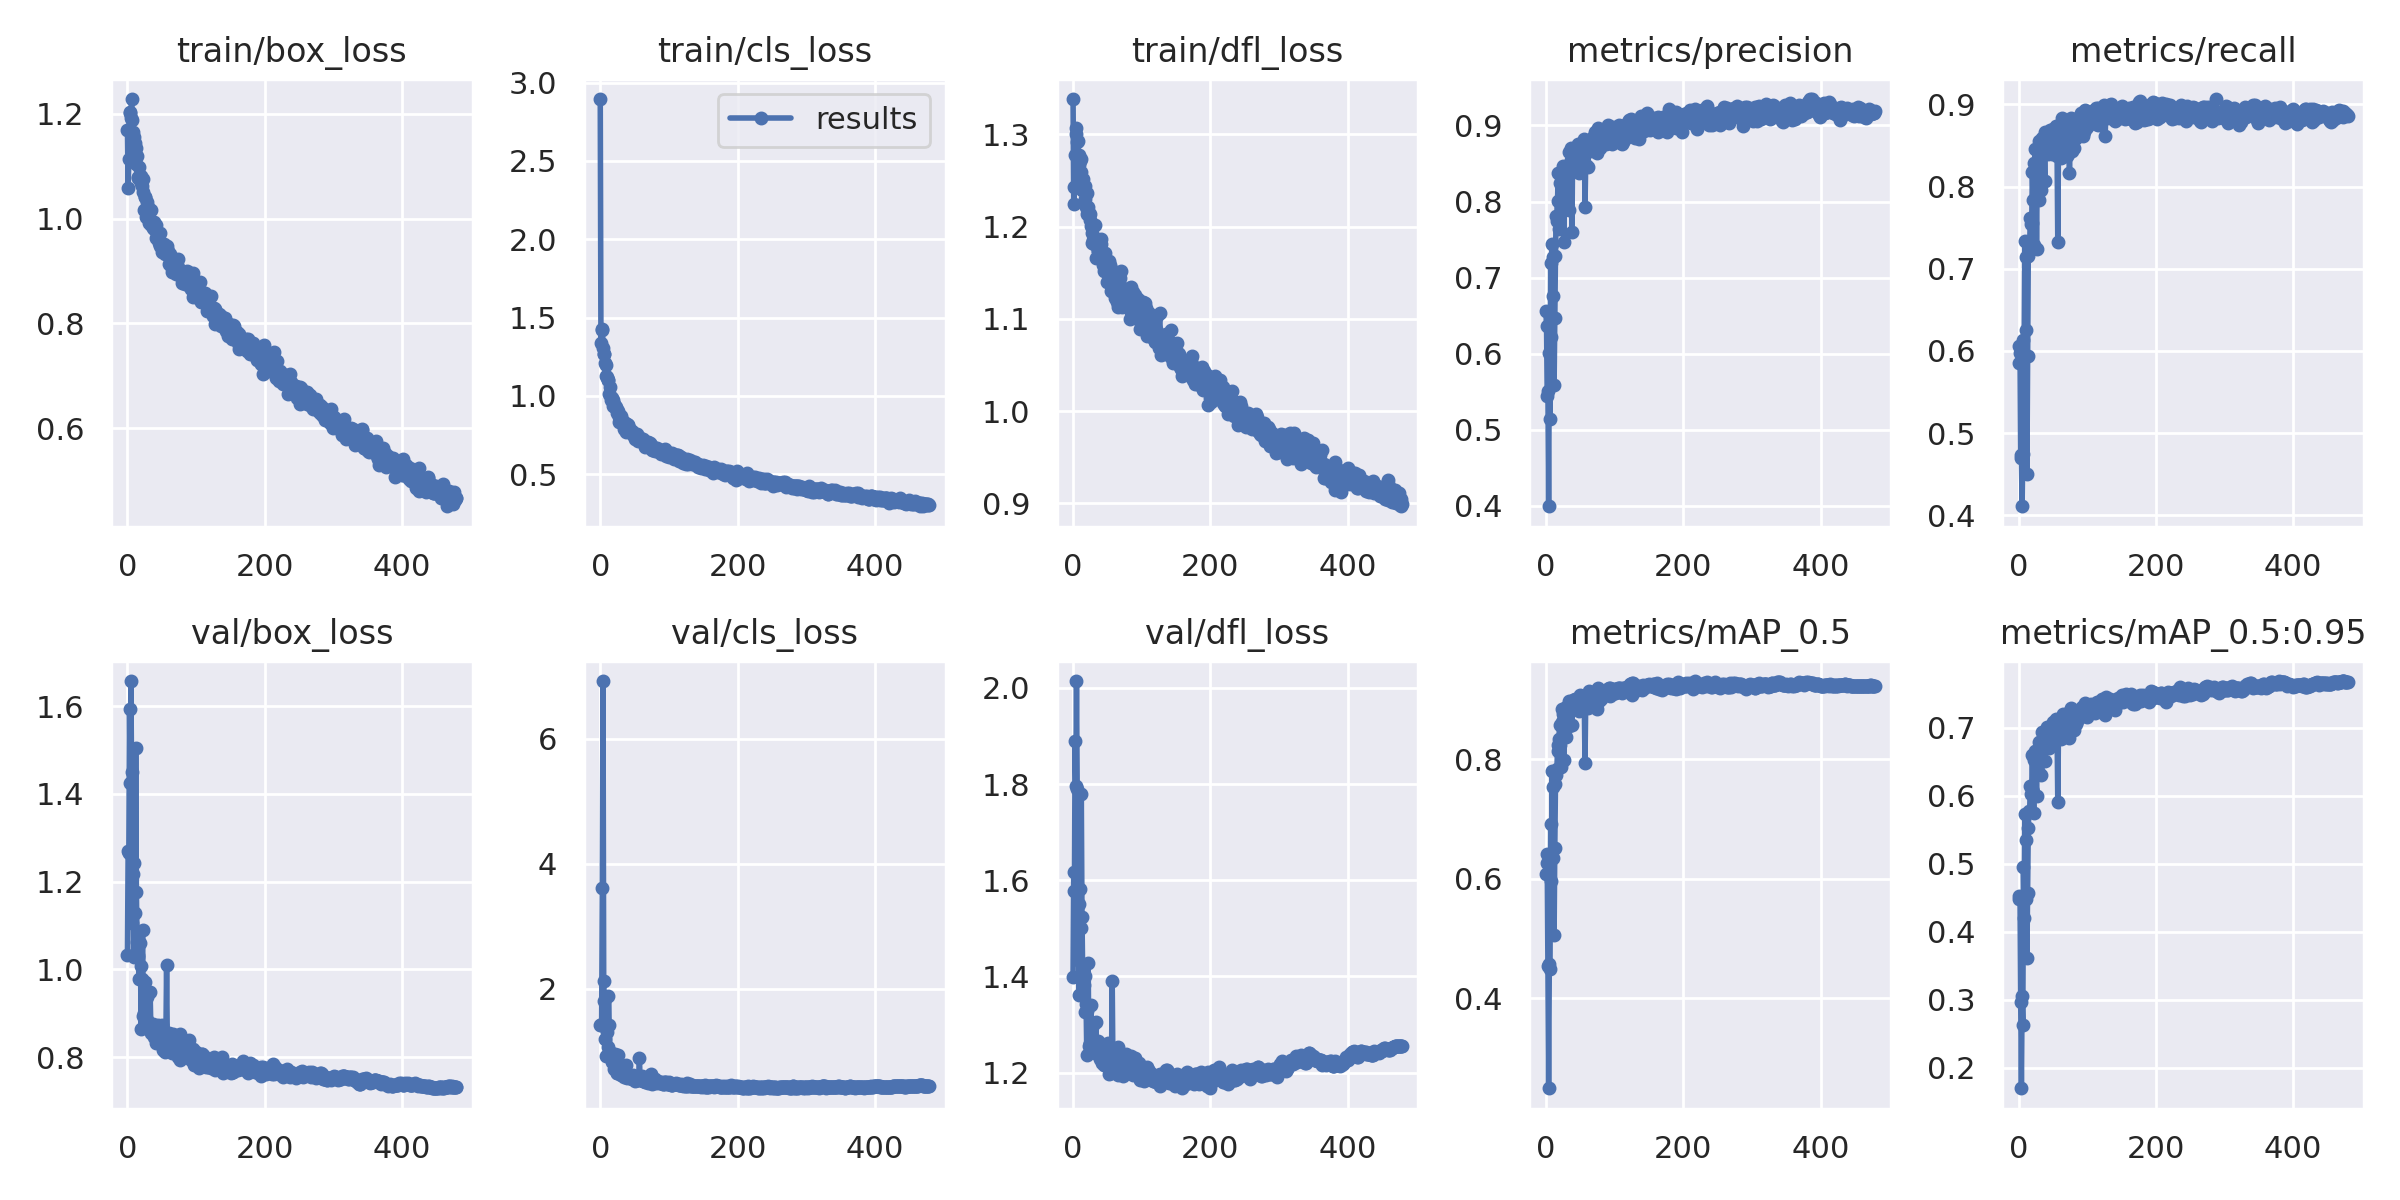

In [11]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

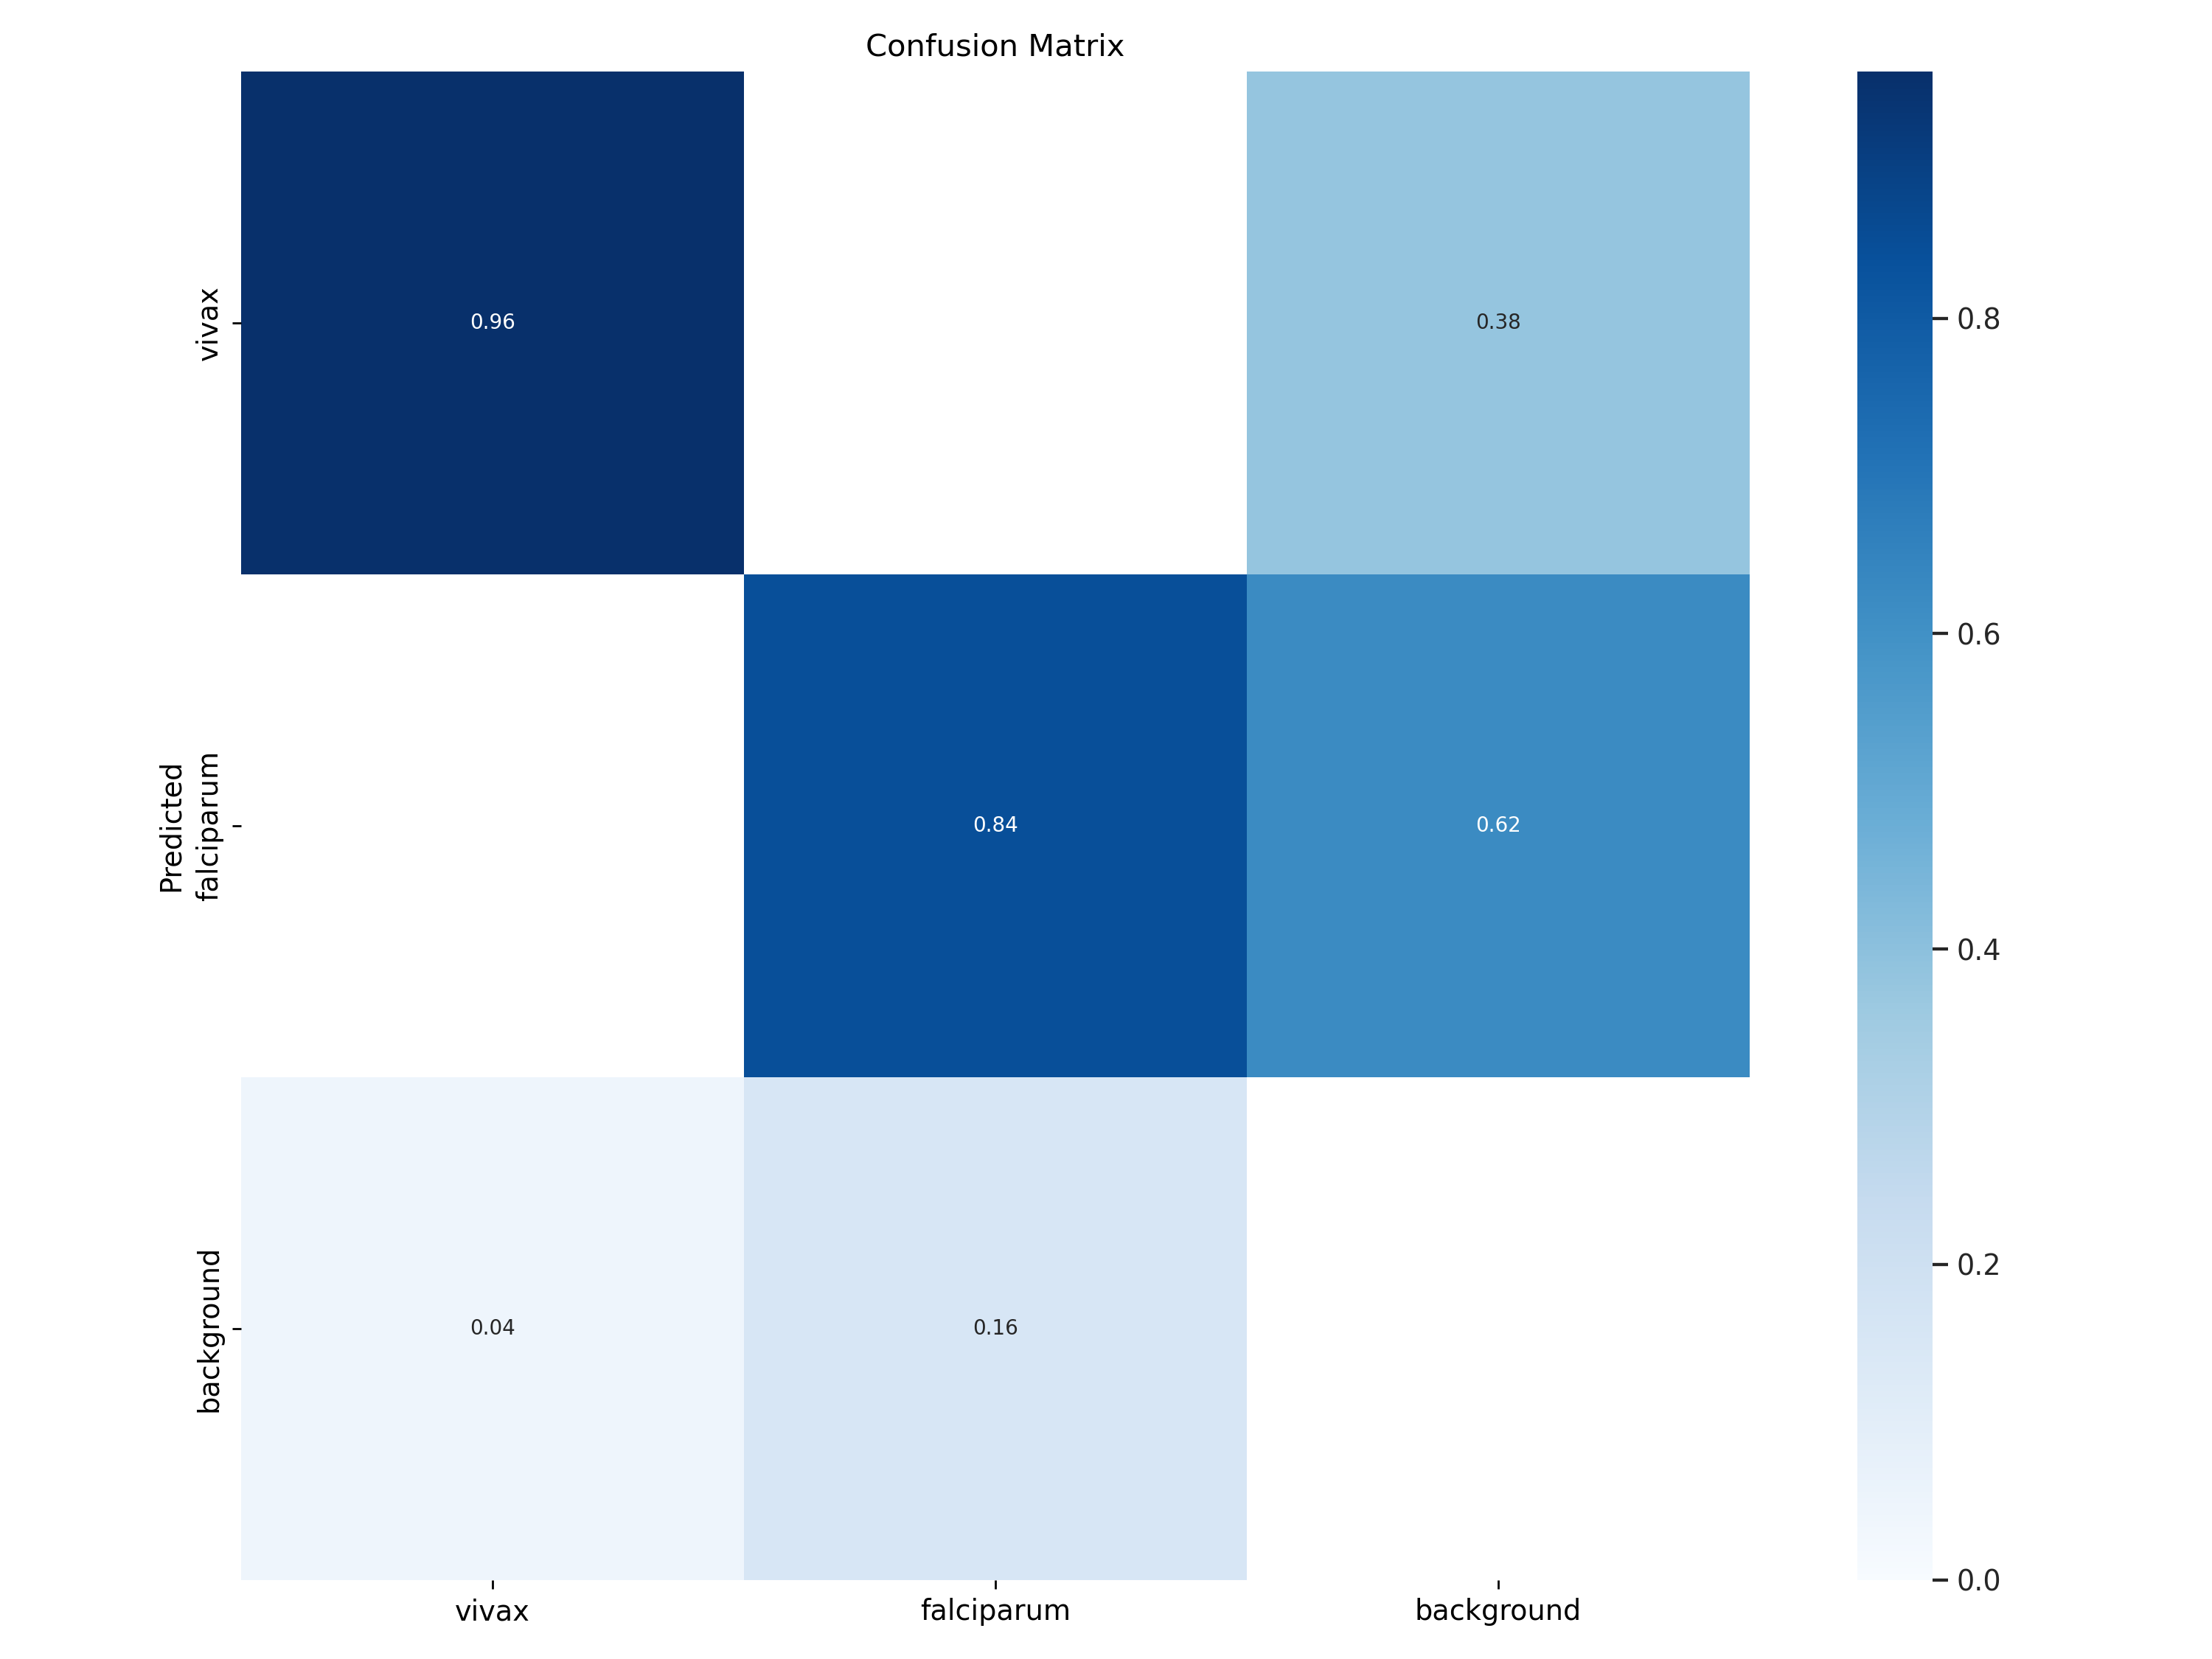

In [12]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

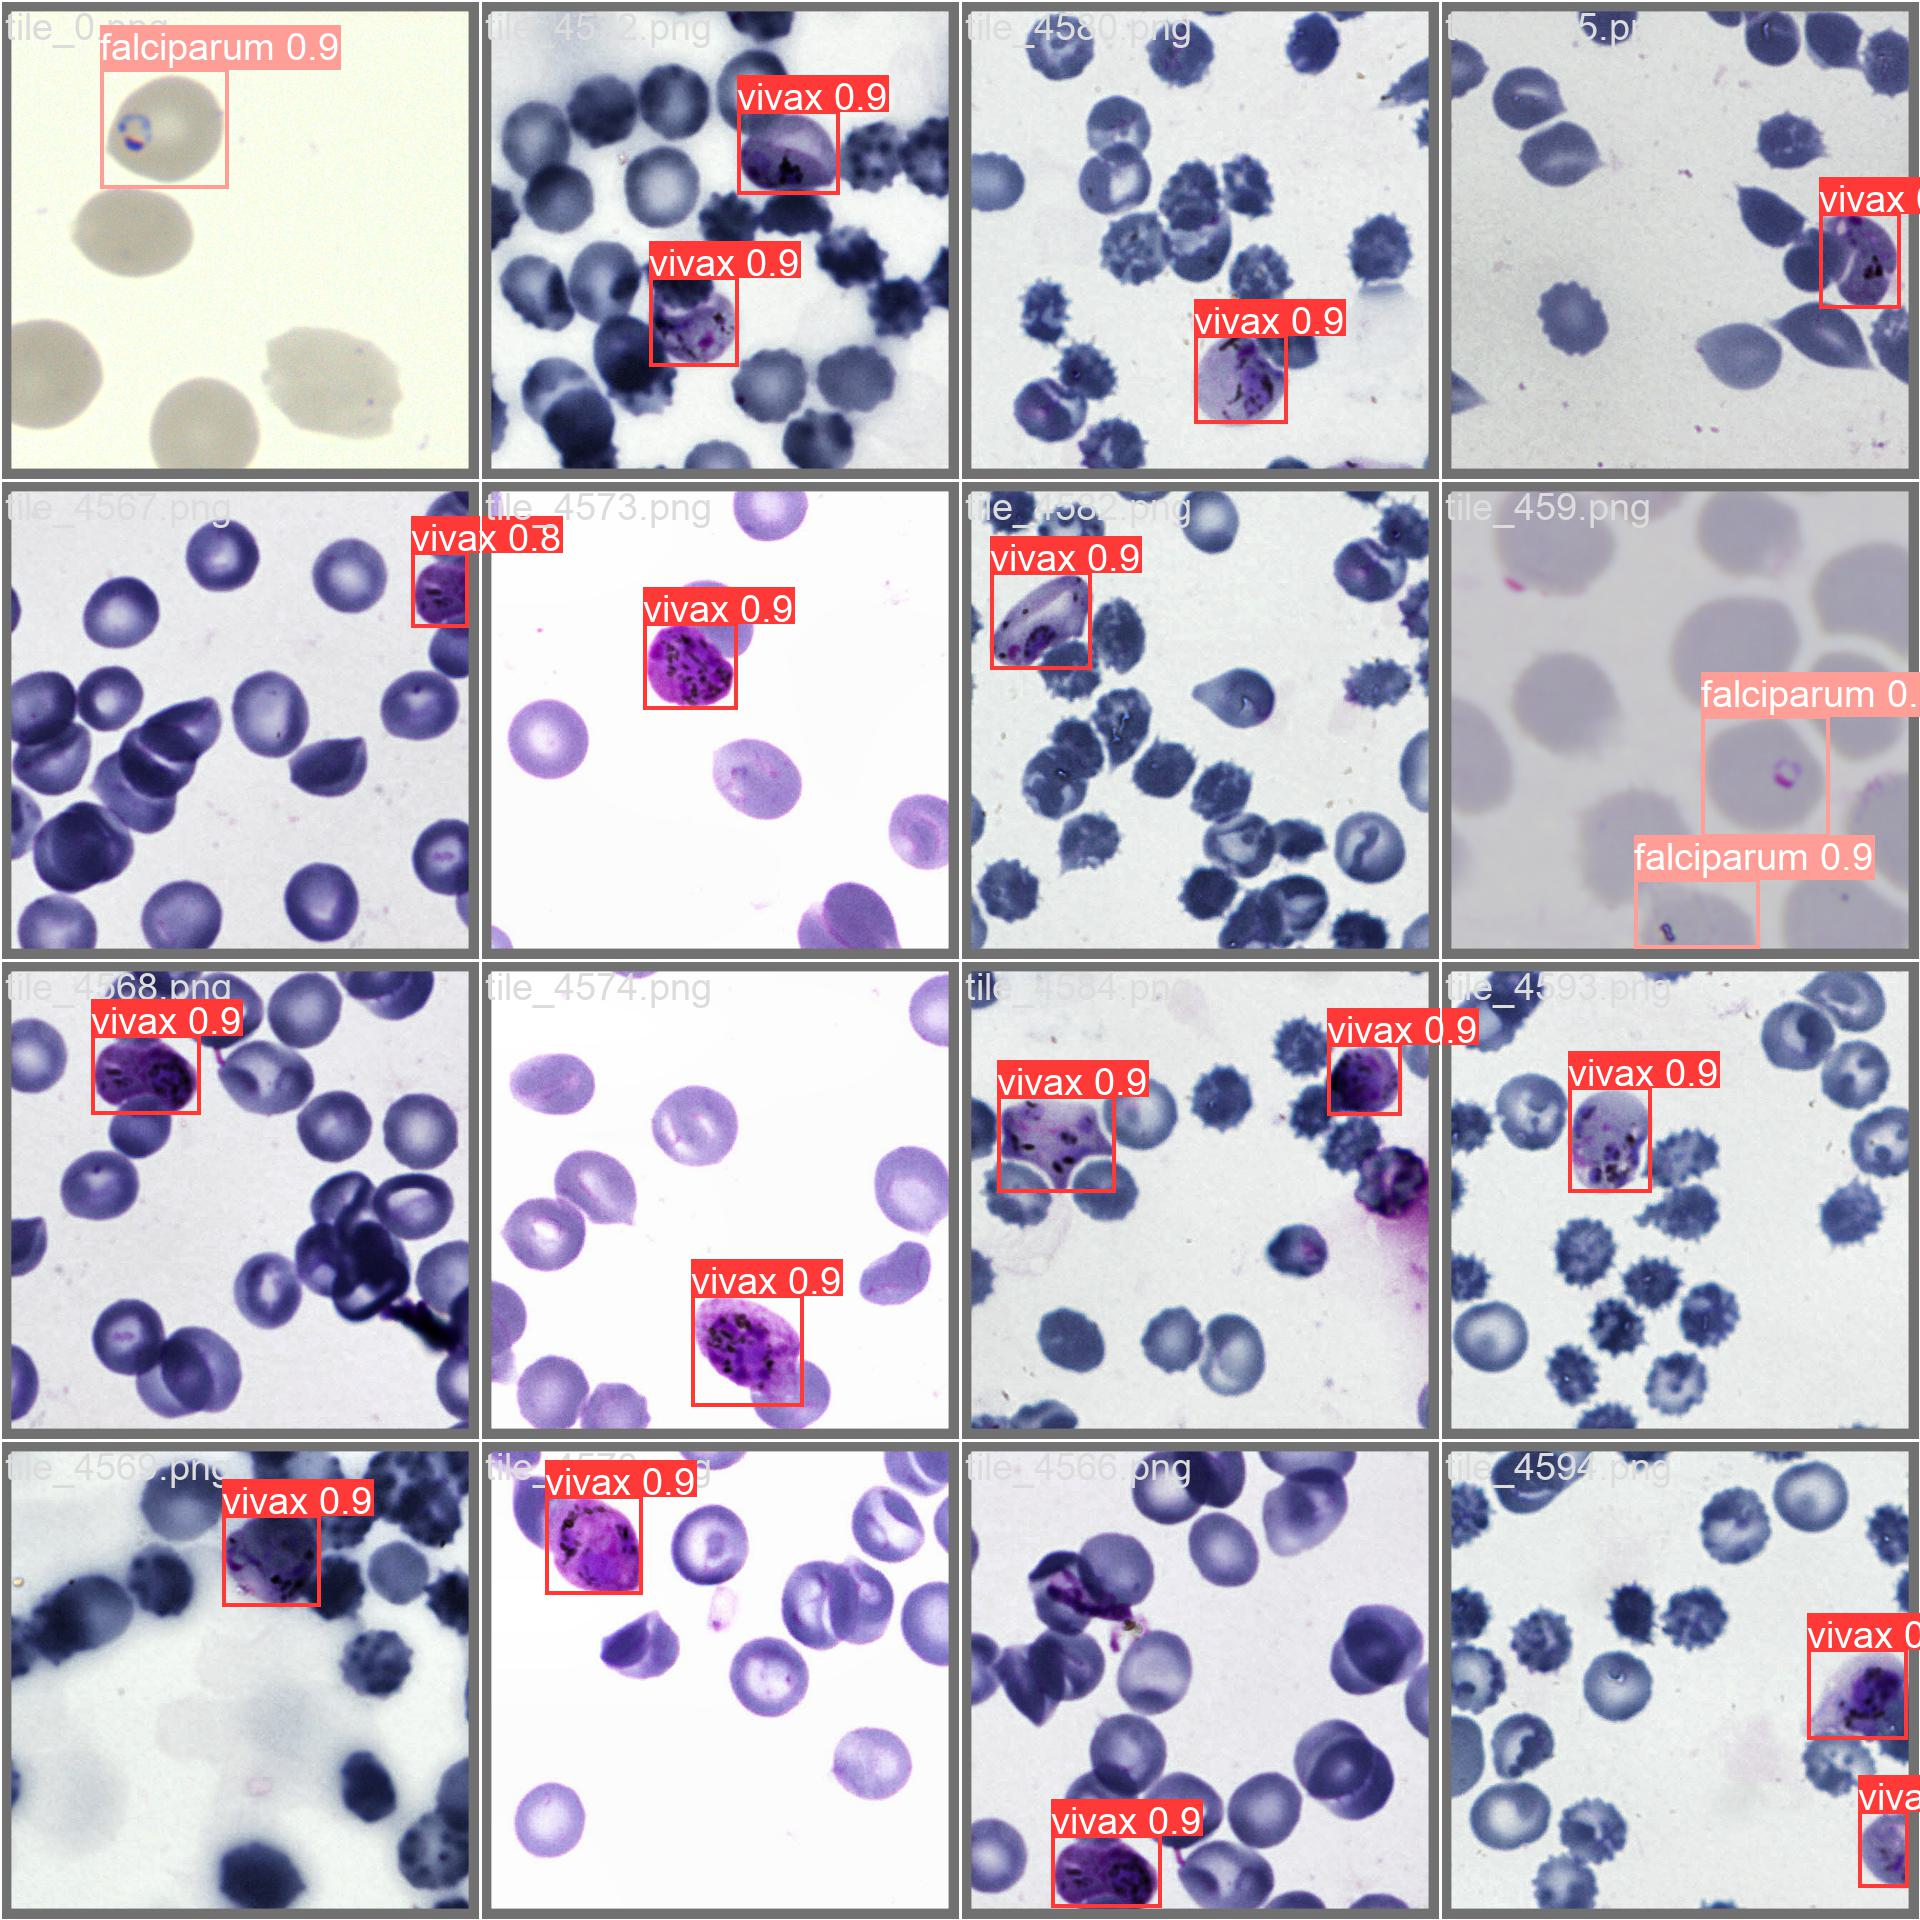

In [13]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [16]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data /blue/eel5934/btulu/Eyosi/malaria_part2/tile_output2/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

/blue/eel5934/btulu/Eyosi/malaria_part2/yolov9
val: data=/blue/eel5934/btulu/Eyosi/malaria_part2/tile_output2/data.yaml, weights=['/blue/eel5934/btulu/Eyosi/malaria_part2/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.9.12 torch-1.13.1 CUDA:0 (NVIDIA A100-SXM4-80GB, 81051MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25412502 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /blue/eel5934/btulu/Eyosi/malaria_part2/tile_output2/val/labels.ca
                 Class     Images  Instances          P          R      mAP50   
                   all       3343       5105      0.924      0.888       0.93      0.768
                 vivax       3343       2163      0.937   

In [17]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source /blue/eel5934/btulu/Eyosi/malaria_part2/tile_output2/test/images

detect: weights=['/blue/eel5934/btulu/Eyosi/malaria_part2/yolov9/runs/train/exp/weights/best.pt'], source=/blue/eel5934/btulu/Eyosi/malaria_part2/tile_output2/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.9.12 torch-1.13.1 CUDA:0 (NVIDIA A100-SXM4-80GB, 81051MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25412502 parameters, 0 gradients, 102.5 GFLOPs
image 1/1434 /blue/eel5934/btulu/Eyosi/malaria_part2/tile_output2/test/images/tile_1002.png: 1280x1280 5 falciparums, 16.7ms
image 2/1434 /blue/eel5934/btulu/Eyosi/malaria_part2/tile_output2/test/images/tile_1006.png: 1280x1280 2 falciparums, 16.7ms
i

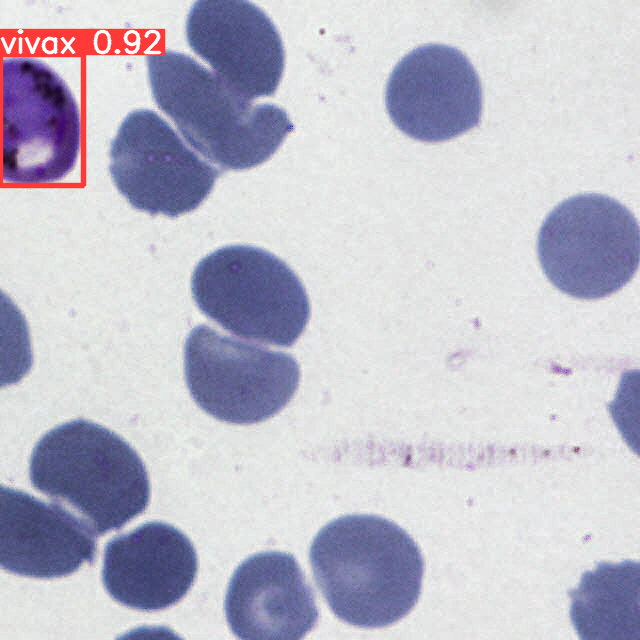

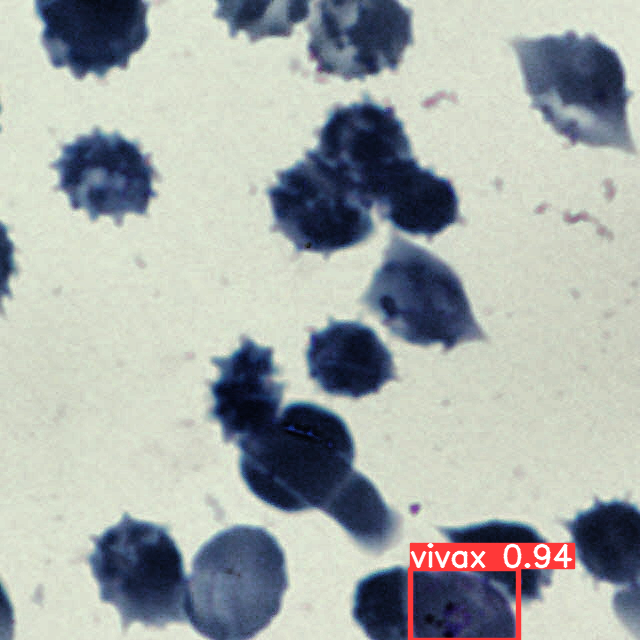

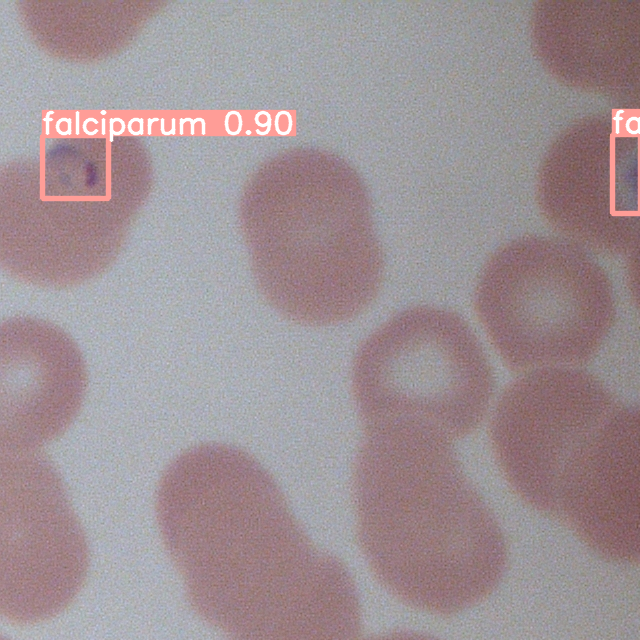

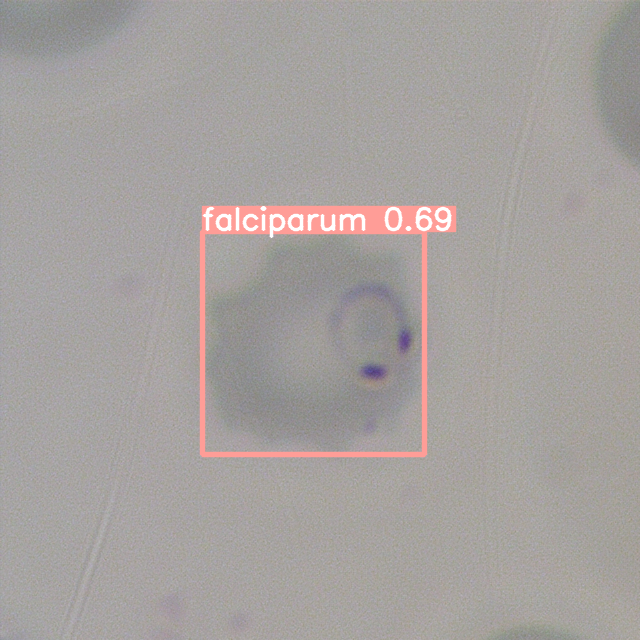

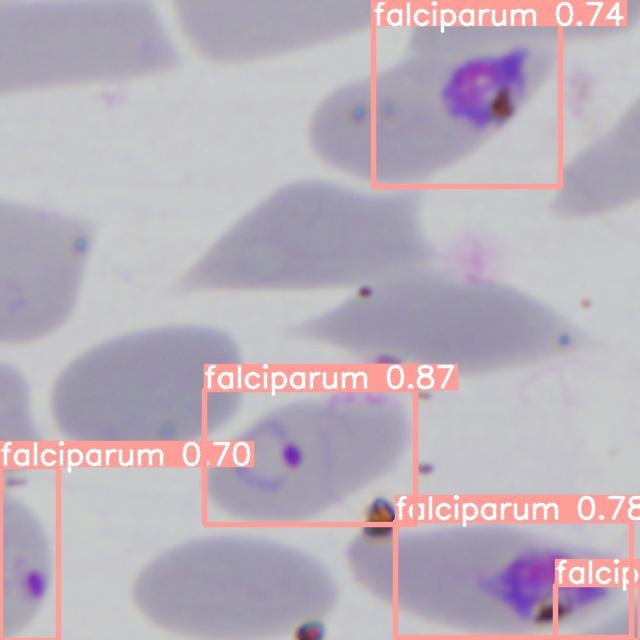

In [18]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp/*.png')[:5]:
      display(Image(filename=image_path, width=600))